In [1]:
cd ..

/Users/bdboy/Desktop/Projects/Facial-Recognition


In [2]:
from siameseNet import SiameseNetwork, ContrastiveLoss
from dataset import FaceDataset,imshow,show_plot,Config

In [3]:
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torchvision.datasets as dset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

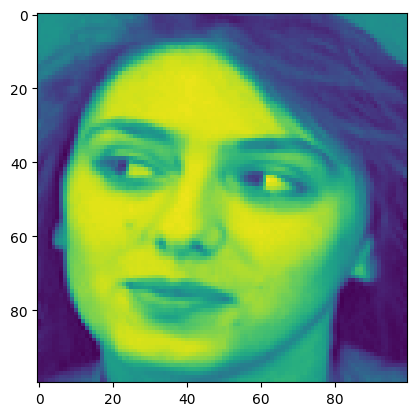

In [5]:
folder_dataset = dset.ImageFolder(root=Config.training_dir)

TRANSFORM = transforms.Compose([transforms.Resize((100,100)),transforms.ToTensor()])
    
siamese_dataset = FaceDataset(face_dir=folder_dataset,transform=TRANSFORM)

img0,img1,label = siamese_dataset[0]
plt.imshow(img0.permute(1, 2, 0))

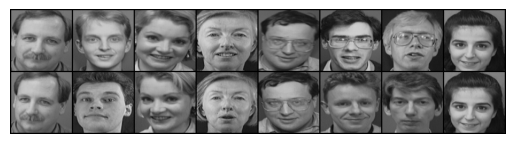

[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]]


In [6]:

vis_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=0,
                        batch_size=8)


example_batch = next(iter(vis_dataloader))
concatenated = torch.cat((example_batch[0],example_batch[1]),0)
imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy())

In [7]:
train_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=0,
                        batch_size=Config.train_batch_size)

In [8]:
net = SiameseNetwork()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(),lr = 0.0005)

In [9]:
counter = []
loss_history = [] 
iteration_number= 0

Epoch number 0
 Current loss 1.8148832321166992

Epoch number 1
 Current loss 5.095214366912842

Epoch number 2
 Current loss 3.6236095428466797

Epoch number 3
 Current loss 0.7191340327262878

Epoch number 4
 Current loss 1.289557695388794

Epoch number 5
 Current loss 1.4803556203842163

Epoch number 6
 Current loss 0.37903061509132385

Epoch number 7
 Current loss 0.3449489176273346

Epoch number 8
 Current loss 0.29514041543006897

Epoch number 9
 Current loss 0.18777036666870117

Epoch number 10
 Current loss 0.25677385926246643

Epoch number 11
 Current loss 0.20309194922447205

Epoch number 12
 Current loss 0.16646863520145416

Epoch number 13
 Current loss 0.17530202865600586

Epoch number 14
 Current loss 0.15323984622955322

Epoch number 15
 Current loss 0.13653120398521423

Epoch number 16
 Current loss 0.12073581665754318

Epoch number 17
 Current loss 0.09835507720708847

Epoch number 18
 Current loss 0.14810693264007568

Epoch number 19
 Current loss 0.08217774331569672


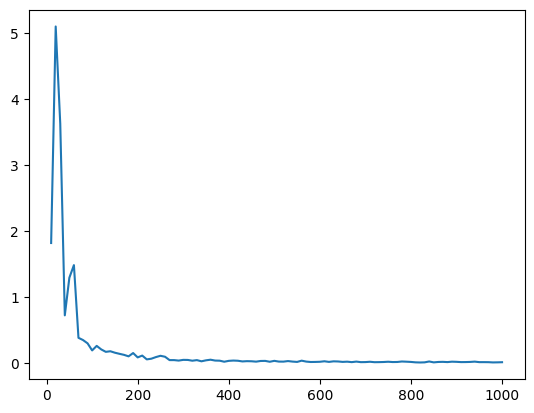

In [10]:
for epoch in range(0,Config.train_number_epochs):
    for i, data in enumerate(train_dataloader,0):
        img0, img1 , label = data
        optimizer.zero_grad()
        output1,output2 = net(img0,img1)
        loss_contrastive = criterion(output1,output2,label)
        loss_contrastive.backward()
        optimizer.step()
        if i %10 == 0 :
            print("Epoch number {}\n Current loss {}\n".format(epoch,loss_contrastive.item()))
            iteration_number +=10
            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())
show_plot(counter,loss_history)

now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
path = './models/siameseNet'+dt_string+'.pth'
torch.save(net.state_dict(), path)

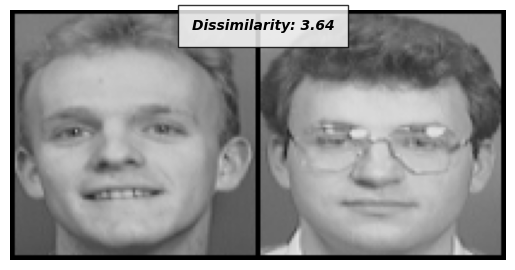

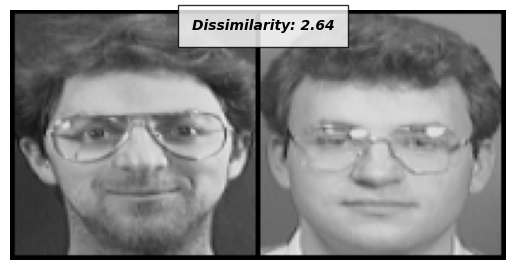

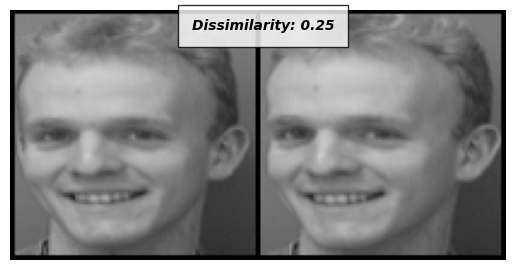

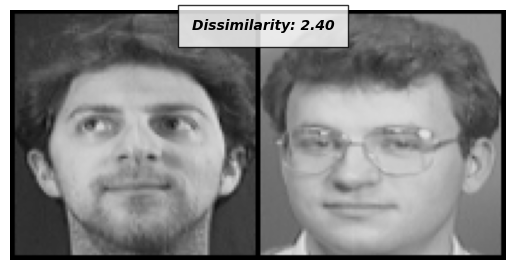

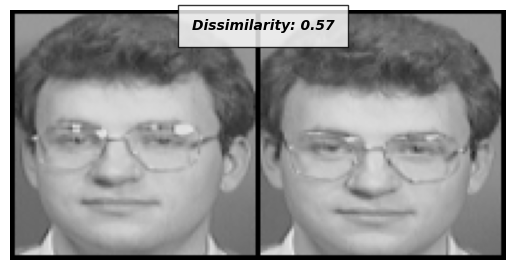

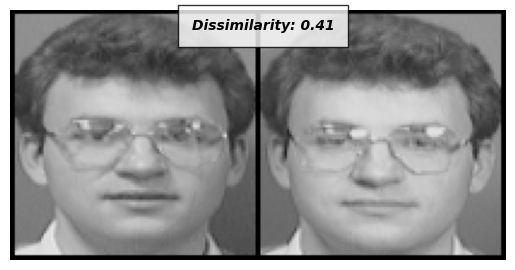

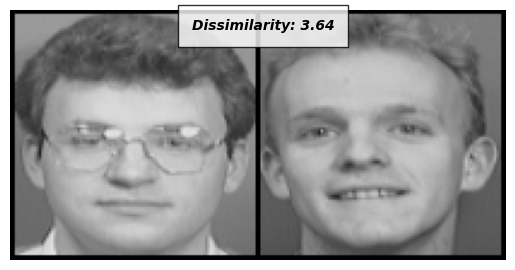

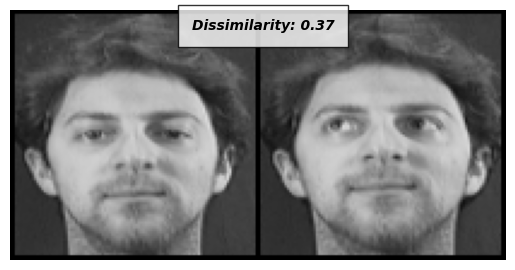

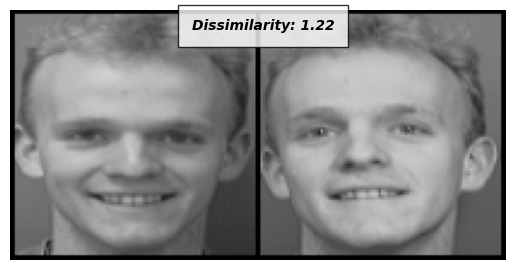

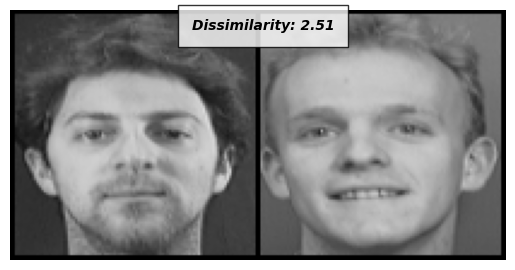

In [11]:
folder_dataset_test = dset.ImageFolder(root=Config.testing_dir)
siamese_dataset_test = FaceDataset(face_dir=folder_dataset_test,transform=TRANSFORM)

test_dataloader = DataLoader(siamese_dataset_test,num_workers=0,batch_size=1,shuffle=True)
dataiter = iter(test_dataloader)

for i in range(10):
    x0,x1,label = next(dataiter)
    concatenated = torch.cat((x0,x1),0)
    
    output1,output2 = net(Variable(x0),Variable(x1))
    euclidean_distance = nn.functional.pairwise_distance(output1, output2)
    imshow(torchvision.utils.make_grid(concatenated),'Dissimilarity: {:.2f}'.format(euclidean_distance.item()))